# Problem Statement

## 

# Import

In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [153]:
act_2017 = pd.read_csv('data/act_2017.csv')
act_2018 = pd.read_csv('data/act_2018.csv')
act_2019 = pd.read_csv('data/act_2019.csv')
region_state = pd.read_csv('data/us_regions_divisions.csv')

## Data Formatting

In [155]:
# Create a new DataFrame with only the common columns for act_2017
act_2017_common = act_2017[['State', 'Participation', 'Composite']].copy()
# Avoid SettingWithCopyWarning with .copy()

# Add a 'Year' column to each DataFrame
act_2017_common['Year'] = 2017
act_2018['Year'] = 2018
act_2019['Year'] = 2019

# Concatenate the DataFrames
full_act = pd.concat([act_2017_common, act_2018, act_2019], ignore_index=True)

# Remove '%' sign from 'Participation' and convert to numeric in one step
full_act['Participation'] = pd.to_numeric(full_act['Participation'].str.replace('%', ''), errors='coerce')
full_act['Composite'] = pd.to_numeric(full_act['Composite'], errors='coerce')
state_counts = full_act['State'].str.upper().unique()

In [156]:
full_act.rename(columns={'State': 'state', 
    'Participation': 'participation', 
    'Composite': 'composite', 
    'Year': 'year'}, inplace=True)

## Data Exploration

In [158]:
full_act.head()

,state,participation,composite,year
0,National,60,21.0,2017
1,Alabama,100,19.2,2017
2,Alaska,65,19.8,2017
3,Arizona,62,19.7,2017
4,Arkansas,100,19.4,2017


In [220]:
full_act.dtypes

state             object
participation      int64
composite        float64
year               int64
dtype: object

In [160]:
full_act.nunique()

state            53
participation    64
composite        63
year              3
dtype: int64

In [161]:
# Check for duplicates in State/Year combinations
duplicates = full_act[full_act.duplicated(subset=['state', 'year'], keep=False)]

if not duplicates.empty:
    print("Warning: Duplicate State/Year combinations found:")
    print(duplicates)
    
    # Optional: Remove duplicates, keeping the first occurrence using the `keep` parameter
    full_act = full_act.drop_duplicates(subset=['state', 'year'], keep='first')
    print("Duplicates have been removed, keeping the first occurrence.")
else:
    print("No duplicates found in State/Year combinations.")

    state  participation  composite  year
71  Maine              7       24.0  2018
72  Maine              7       24.0  2018
Duplicates have been removed, keeping the first occurrence.


In [162]:
national_index = full_act[full_act['state'] == 'National'].index
full_act = full_act.drop(national_index).reindex()
full_act

# Visualization

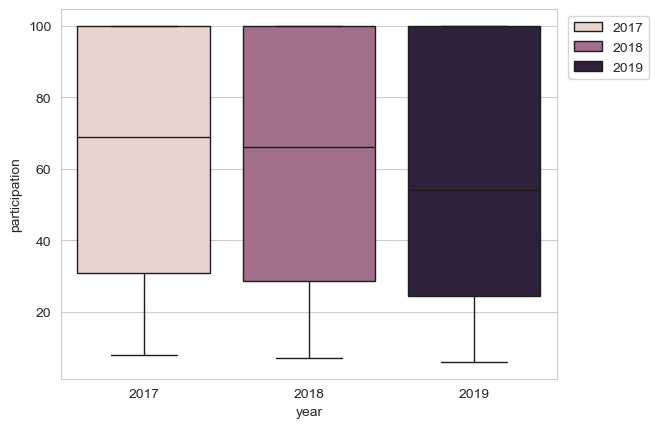

In [164]:
sns.boxplot(x='year', y='participation', data=full_act, hue='year')
plt.legend(bbox_to_anchor=(1.20, 1), loc='upper right')
plt.show()

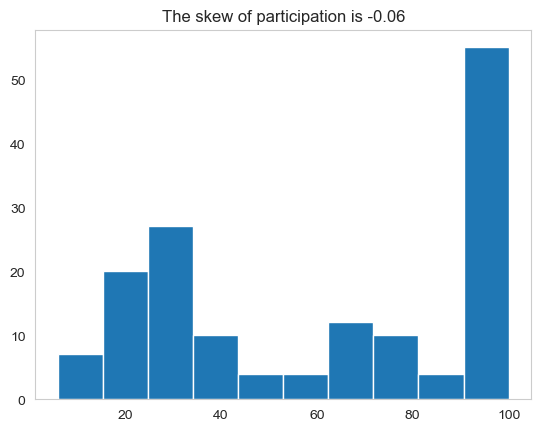

In [182]:
full_act['participation'].skew()
full_act['participation'].hist(grid=False);
plt.title(f"The skew of participation is {full_act['participation'].skew().round(2)}");

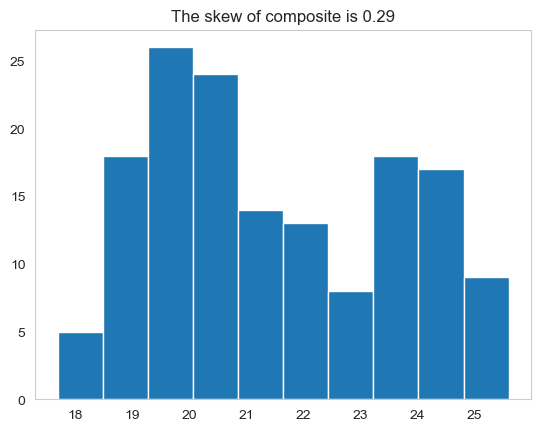

In [184]:
full_act['composite'].skew()
full_act['composite'].hist(grid=False);
plt.title(f"The skew of composite is {full_act['composite'].skew().round(2)}");

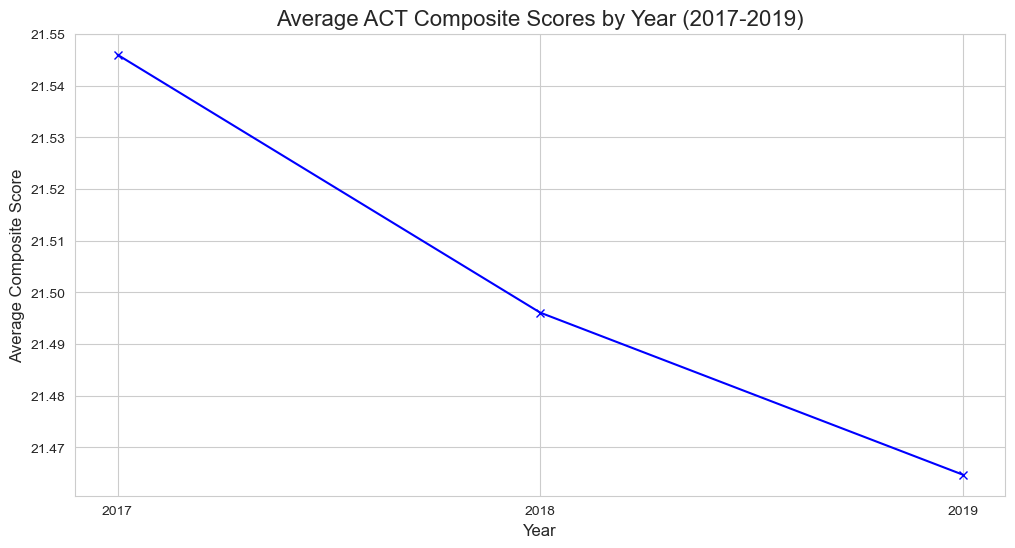

In [260]:
# Plot a line graph for composite scores over years
plt.figure(figsize=(12, 6))

# Group by year and calculate average composite score

avg_composite_by_year = full_act.groupby('year')['composite'].mean()

# Plot
plt.plot(avg_composite_by_year.index.values.astype(str), avg_composite_by_year.values, marker='x', linestyle='-', color='blue')
plt.title('Average ACT Composite Scores by Year (2017-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average Composite Score', fontsize=12)
plt.grid(True)
plt.savefig('Average_ACT_Composite.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

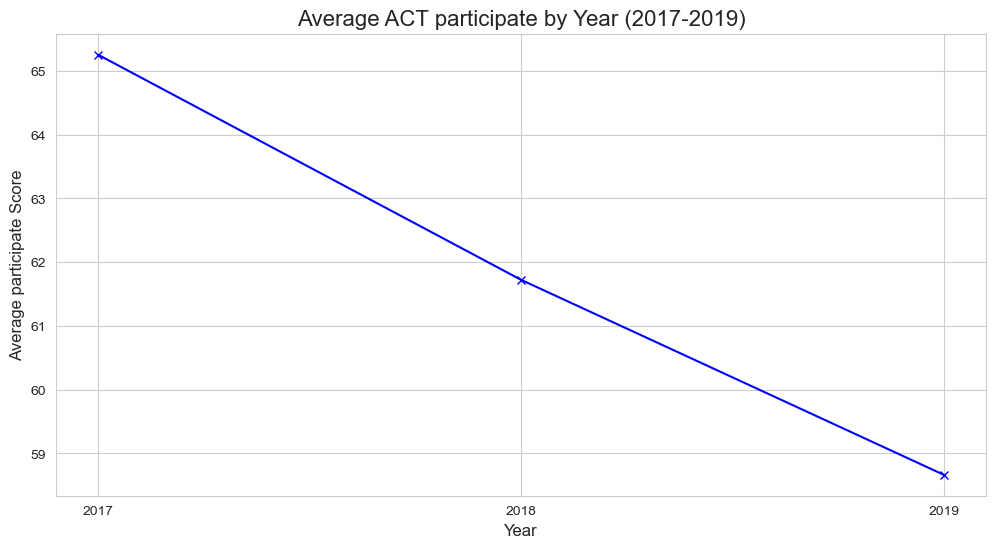

In [268]:
# Plot a line graph for composite scores over years
plt.figure(figsize=(12, 6))

# Group by year and calculate average composite score

avg_participate_by_year = full_act.groupby('year')['participation'].mean()

# Plot
plt.plot(avg_participate_by_year.index.values.astype(str), avg_participate_by_year.values, marker='x', linestyle='-', color='blue')
plt.title('Average ACT participate by Year (2017-2019)', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Average participate Score', fontsize=12)
plt.grid(True)
plt.savefig('avg_participate_by_year.png', dpi=300, bbox_inches='tight')
# Show the plot
plt.show()

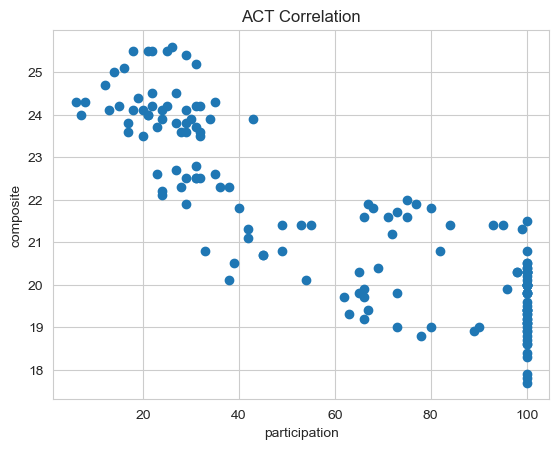

In [236]:
correlation = full_act['participation'].corr(full_act['composite'])
plt.scatter(full_act['participation'],full_act['composite'])

plt.title("ACT Correlation")
plt.ylabel("composite", fontsize = 10)
plt.xlabel("participation", fontsize = 10);
plt.savefig('scatter_p_c.png', dpi=300, bbox_inches='tight')

Text(0, 0.5, 'Participation Rate (%)')

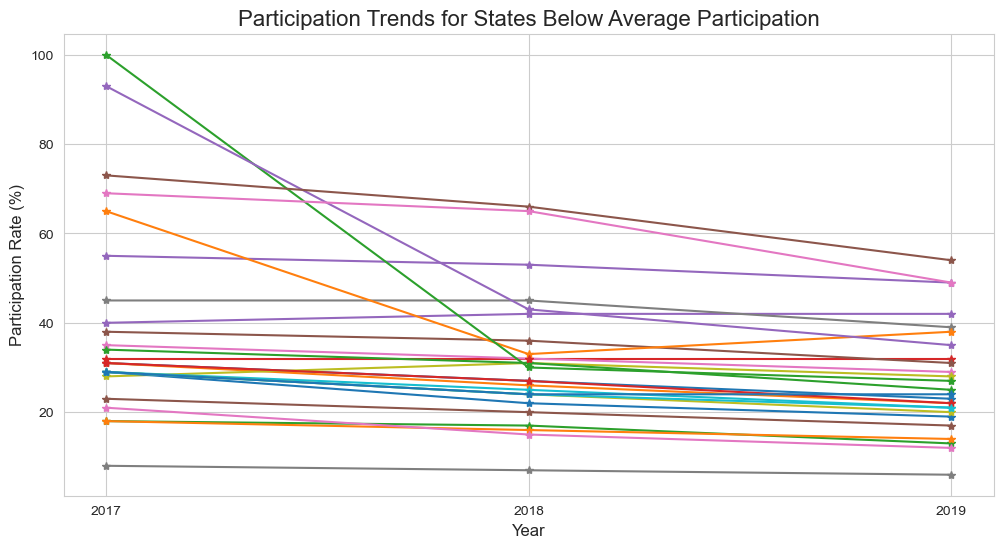

In [262]:
mean_participation = full_act['participation'].mean()
states_below_average = full_act[full_act['participation'] < mean_participation]

unique_state=states_below_average['state'].unique()
plt.figure(figsize=(12, 6))
trends_below_average = full_act[full_act['state'].isin(unique_state)]
# Loop through each unique state and plot its participation trend
for state in unique_state:
    state_data = trends_below_average[trends_below_average['state'] == state]
    plt.plot(state_data['year'].astype(str), state_data['participation'], marker='*', label=state)

# Add labels and title
plt.title('Participation Trends for States Below Average Participation', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Participation Rate (%)', fontsize=12)